In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [168]:
! python3 eval.py

Loaded 100 instruments for 250 days
Day 201 value: -2165.98 todayPL: $-2165.98 $-traded: 433197 return: -0.00500 frac0: 1.0000 frac1: 0.0000
Day 202 value: -1659.05 todayPL: $506.94 $-traded: 468047 return: -0.00354 frac0: 1.0000 frac1: 0.0000
Day 203 value: -1780.86 todayPL: $-121.82 $-traded: 479455 return: -0.00371 frac0: 1.0000 frac1: 0.0000
Day 204 value: -2358.06 todayPL: $-577.20 $-traded: 488838 return: -0.00482 frac0: 1.0000 frac1: 0.0000
Day 205 value: -3395.31 todayPL: $-1037.25 $-traded: 495385 return: -0.00685 frac0: 1.0000 frac1: 0.0000
Day 206 value: -4090.21 todayPL: $-694.90 $-traded: 500592 return: -0.00817 frac0: 1.0000 frac1: 0.0000
Day 207 value: -4386.37 todayPL: $-296.16 $-traded: 505376 return: -0.00868 frac0: 1.0000 frac1: 0.0000
Day 208 value: -4044.51 todayPL: $341.87 $-traded: 509605 return: -0.00794 frac0: 1.0000 frac1: 0.0000
Day 209 value: -4604.37 todayPL: $-559.87 $-traded: 513723 return: -0.00896 frac0: 1.0000 frac1: 0.0000
Day 210 value: -4308.60 toda

In [200]:
df = pd.read_csv("prices250.txt", sep='\s+', header=None, index_col=None)
df["ind1"] = df.iloc[:,:50].mean(axis=1)
df["ind2"] = df.iloc[:,50:].mean(axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,ind1,ind2
0,18.25,7.34,17.95,0.57,2.41,8.46,17.57,22.02,16.62,3.39,...,19.85,20.22,28.25,16.67,20.92,3.33,2.64,19.19,22.2414,17.572773
1,18.22,7.35,18.01,0.57,2.41,8.38,17.58,22.15,16.62,3.35,...,20.08,19.88,27.56,16.41,21.36,3.31,2.63,19.75,22.2058,17.502467
2,18.28,7.34,18.04,0.57,2.41,8.42,17.52,22.57,16.63,3.34,...,21.41,21.06,28.12,16.49,21.63,3.36,2.67,20.07,22.1872,17.775435
3,18.07,7.35,17.99,0.57,2.41,8.27,17.53,22.48,16.66,3.30,...,20.36,20.92,27.95,15.68,22.00,3.27,2.61,21.00,22.1500,17.878627
4,18.20,7.37,17.94,0.58,2.41,8.42,17.42,22.86,16.58,3.29,...,20.34,21.69,27.42,16.03,21.43,3.26,2.70,20.37,22.1576,17.801718


In [134]:
train = df.iloc[0:200]
test = df.iloc[200:]

In [135]:
cum_returns = train/train.iloc[0]
cum_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,ind1,ind2
0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998356,1.001362,1.003343,1.000000,1.0,0.990544,1.000569,1.005904,1.000000,0.988201,...,1.011587,0.983185,0.975575,0.984403,1.021033,0.993994,0.996212,1.029182,0.998399,0.995999
2,1.001644,1.000000,1.005014,1.000000,1.0,0.995272,0.997154,1.024977,1.000602,0.985251,...,1.078589,1.041543,0.995398,0.989202,1.033939,1.009009,1.011364,1.045857,0.997563,1.011533
3,0.990137,1.001362,1.002228,1.000000,1.0,0.977541,0.997723,1.020890,1.002407,0.973451,...,1.025693,1.034619,0.989381,0.940612,1.051625,0.981982,0.988636,1.094320,0.995891,1.017405
4,0.997260,1.004087,0.999443,1.017544,1.0,0.995272,0.991463,1.038147,0.997593,0.970501,...,1.024685,1.072700,0.970619,0.961608,1.024379,0.978979,1.022727,1.061490,0.996232,1.013028


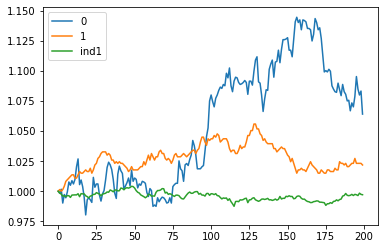

In [199]:
for i in range(2):
    cum_returns[i].plot()
cum_returns["ind1"].plot()
plt.legend()

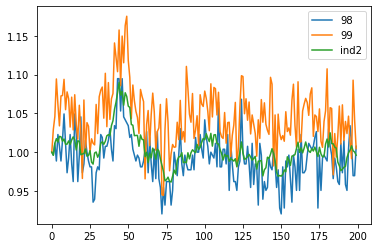

In [195]:
for i in range(98,100):
    cum_returns[i].plot()
cum_returns["ind2"].plot()
plt.legend()

In [138]:
cum_returns.shape

(200, 102)

In [147]:
daily_returns = train.iloc[1:].reset_index(drop=True) / train - 1
daily_returns.drop(daily_returns.shape[0]-1, inplace=True)
daily_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,ind1,ind2
0,-0.001644,0.001362,0.003343,0.000000,0.0,-0.009456,0.000569,0.005904,0.000000,-0.011799,...,0.011587,-0.016815,-0.024425,-0.015597,0.021033,-0.006006,-0.003788,0.029182,-0.001601,-0.004001
1,0.003293,-0.001361,0.001666,0.000000,0.0,0.004773,-0.003413,0.018962,0.000602,-0.002985,...,0.066235,0.059356,0.020319,0.004875,0.012640,0.015106,0.015209,0.016203,-0.000838,0.015596
2,-0.011488,0.001362,-0.002772,0.000000,0.0,-0.017815,0.000571,-0.003988,0.001804,-0.011976,...,-0.049043,-0.006648,-0.006046,-0.049121,0.017106,-0.026786,-0.022472,0.046338,-0.001677,0.005805
3,0.007194,0.002721,-0.002779,0.017544,0.0,0.018138,-0.006275,0.016904,-0.004802,-0.003030,...,-0.000982,0.036807,-0.018962,0.022321,-0.025909,-0.003058,0.034483,-0.030000,0.000343,-0.004302
4,-0.002747,0.004071,0.008361,-0.017241,0.0,0.011876,0.005166,-0.006562,-0.013269,0.009119,...,0.026057,0.011987,0.036470,-0.019339,0.056930,0.021472,-0.014815,-0.026019,-0.000903,0.007204


In [148]:
corrs = daily_returns.corr()
corrs.head()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,ind1,ind2
0,1.000000,-0.060405,-0.004548,0.022147,0.003133,0.052167,0.048011,0.082576,0.029348,0.082552,...,0.046393,0.055107,0.055616,-0.157866,-0.062920,-0.106665,-0.032212,0.033268,0.131048,-0.074757
1,-0.060405,1.000000,0.035874,-0.021503,0.073943,0.033304,0.024978,-0.049378,-0.113802,-0.025827,...,-0.026256,-0.043867,0.067362,-0.062176,-0.101688,0.037108,0.023712,-0.046528,-0.023569,0.047067
2,-0.004548,0.035874,1.000000,-0.032280,0.139535,-0.052589,-0.051164,-0.108582,0.032374,-0.023302,...,-0.050554,-0.134906,0.014584,0.037314,-0.076746,0.052589,-0.025157,-0.054100,0.009399,0.028185
3,0.022147,-0.021503,-0.032280,1.000000,-0.008087,0.028757,0.101700,0.075689,0.064313,-0.037382,...,-0.097329,0.001709,-0.000111,-0.034858,0.018941,0.031095,-0.040973,-0.081134,0.113072,0.023852
4,0.003133,0.073943,0.139535,-0.008087,1.000000,-0.075137,0.018522,0.083809,0.080743,0.046983,...,-0.016762,0.016037,0.065125,-0.124833,0.014729,-0.011953,-0.033248,-0.102526,0.025616,0.020794


<AxesSubplot:>

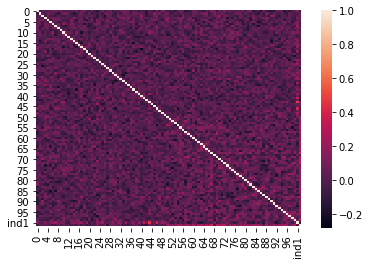

In [143]:
sns.heatmap(corrs)

<AxesSubplot:>

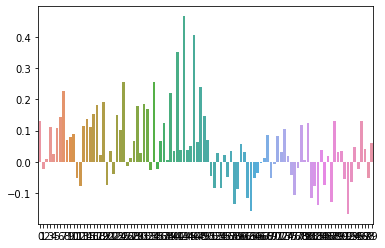

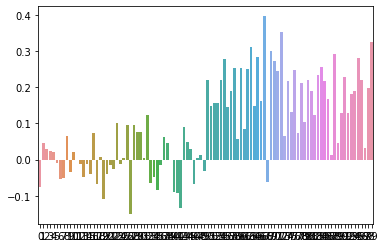

In [174]:
plt.figure()
sns.barplot(x=corrs["ind1"][:-2].index, y=corrs["ind1"][:-2].values)
plt.figure()
sns.barplot(x=corrs["ind2"][:-2].index, y=corrs["ind2"][:-2].values)

<AxesSubplot:>

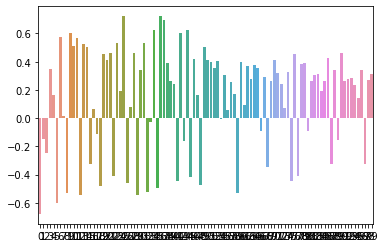

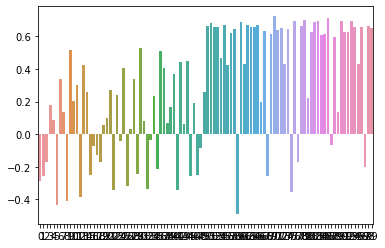

In [180]:
cum_corr = cum_returns.corr()
sns.barplot(x=cum_corr["ind1"][:-2].index, y=cum_corr["ind1"][:-2].values)
plt.figure()
sns.barplot(x=cum_corr["ind2"][:-2].index, y=cum_corr["ind2"][:-2].values)

<AxesSubplot:>

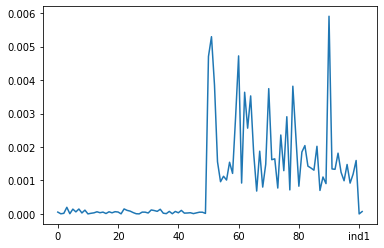

In [144]:
daily_returns.var().plot()
# Instruments 0-49 much less volatile than 50-99

In [188]:
betas = (train.cov() / train.var())[["ind1", "ind2"]]
betas.head()

,ind1,ind2
0,-8.421762,-0.678860
1,-0.162517,-0.054509
2,-0.826740,-0.108078
3,0.154207,0.014926
4,0.049815,0.004910
